In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
(trainX, trainY), (testX, testY) = datasets.mnist.load_data()

In [3]:
def reshape_and_normalize(images):
    num = images.shape[0]
    images = images.reshape(num, 28, 28, 1)
    images = images / 255

    return images

In [4]:
trainX = reshape_and_normalize(trainX)
testX = reshape_and_normalize(testX)

In [5]:
model = models.Sequential([
          layers.Conv2D(64,(3,3),activation = 'relu',input_shape = (28,28,1)),
          layers.MaxPooling2D(2,2),
          layers.Conv2D(64,(3,3),activation = 'relu'),
          layers.MaxPooling2D(2,2),
          layers.Flatten(),
          layers.Dense(128,activation = 'relu'),
          layers.Dense(10,activation = 'softmax')
    ])

In [6]:
model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [7]:
history = model.fit(trainX, trainY, epochs=5, validation_data=(testX, testY))

Epoch 1/5
1875/1875 [==============================] - 83s 44ms/step - loss: 0.1224 - accuracy: 0.9624 - val_loss: 0.0454 - val_accuracy: 0.9852
Epoch 2/5
1875/1875 [==============================] - 85s 45ms/step - loss: 0.0414 - accuracy: 0.9875 - val_loss: 0.0363 - val_accuracy: 0.9884
Epoch 3/5
1875/1875 [==============================] - 81s 43ms/step - loss: 0.0282 - accuracy: 0.9908 - val_loss: 0.0276 - val_accuracy: 0.9909
Epoch 4/5
1875/1875 [==============================] - 85s 45ms/step - loss: 0.0209 - accuracy: 0.9934 - val_loss: 0.0300 - val_accuracy: 0.9901
Epoch 5/5
1875/1875 [==============================] - 88s 47ms/step - loss: 0.0150 - accuracy: 0.9952 - val_loss: 0.0316 - val_accuracy: 0.9906


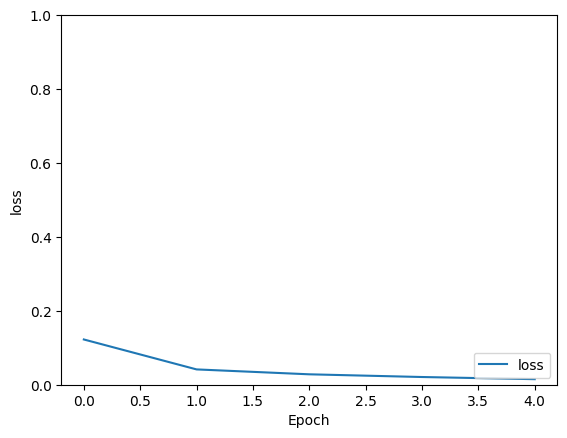

In [9]:
plt.plot(history.history['loss'], label='loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()